In [12]:
# import libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# read data 
insurance = pd.read_csv('C:/Users/Dell/Desktop/Task1/Task1/insurance.csv')
# get information on data 
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


no null values present

In [3]:
# since ML cant work with object data we must transfer them to numbers using dummy variable method 
insurance_new = pd.get_dummies(data = insurance, prefix_sep='_', columns = ['sex','children', 'smoker', 'region'] , drop_first =True , dtype='int64')

# boxcox is used to normalize the charges
transformed ,lamda , confidence= boxcox(insurance_new['charges'],alpha=0.05)

# transform the charges into a log scale would result in a much realistic results
insurance_new['charges'] = np.log(insurance_new['charges'])

insurance_new['charges']

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [4]:
# seperate the independent variables that are all except charges
X = insurance_new.drop('charges',axis=1) 
# seperate the dependent variables that are all except charges
y = insurance_new['charges']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [5]:
# 1. using normal equation of linear regression
X0_train = np.c_[ np.ones( (X_train.shape[0] , 1) ), X_train ]
X0_test = np.c_[ np.ones(( X_test.shape[0] , 1) ), X_test ]

#build model using equation
theta = np.matmul( np.linalg.inv( np.matmul(X0_train.T , X0_train) ), np.matmul( X0_train.T , y_train )) 

# The parameters of linear regression normal equation model
parameter = ['theta_'+str(i) for i in range( X0_train.shape[1] ) ]
columns = ['intersect:x_0=1'] + list( X.columns.values )

# create dataframe of the paramters
parameter_df = pd.DataFrame({ 'theta':theta, 'Parameter' :parameter,'Columns':columns})


In [6]:
# 2. Scikit Learn  linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# The parameters of linear regression sklearn model
scikit_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(scikit_theta, name='Scikit_theta'))

# display the dataframe comparing the thetas of both scikit and normal equation
parameter_df

,theta,Parameter,Columns,Scikit_theta
0,7.059171,theta_0,intersect:x_0=1,7.059171
1,0.033134,theta_1,age,0.033134
2,0.013517,theta_2,bmi,0.013517
3,-0.067767,theta_3,sex_male,-0.067767
4,0.149457,theta_4,children_1,0.149457
5,0.272919,theta_5,children_2,0.272919
6,0.244095,theta_6,children_3,0.244095
7,0.523339,theta_7,children_4,0.523339
8,0.466030,theta_8,children_5,0.466030
9,1.550481,theta_9,smoker_yes,1.550481


The Mean Square Error using normal equation:  0.18729622322981948
R squared using normal equation:  0.7795687545055312


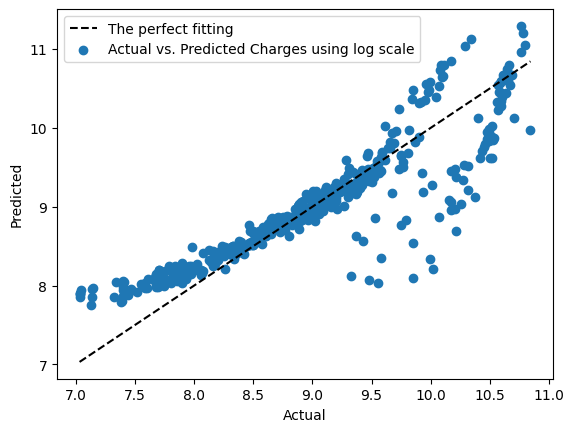

In [20]:
# for Normal equation we'll calculate the mse and rsquared to evaluate the model
y_pred_normal =  np.matmul(X0_test,theta)

#calculate mean squared error
mse = np.sum((y_pred_normal - y_test)**2) / X0_test.shape[0]

# sum of squared error
sse = np.sum((y_pred_normal - y_test)**2)

# sum of square total
sst = np.sum((y_test - y_test.mean())**2)

# Rsquared equals 1-(sum of squared error/sum of square total)
Rsquared = 1 - (sse/sst)

print('The Mean Square Error using normal equation: ',mse)
print('R squared using normal equation: ',Rsquared)

#plotting of actual vs predicted charges
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', label='The perfect fitting',color='black')
plt.scatter(y_test, y_pred_normal, label='Actual vs. Predicted Charges using log scale')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

The Mean Square Error using scikit-learn:  0.18729622322981898
R square using scikit-learn : 0.7795687545055318


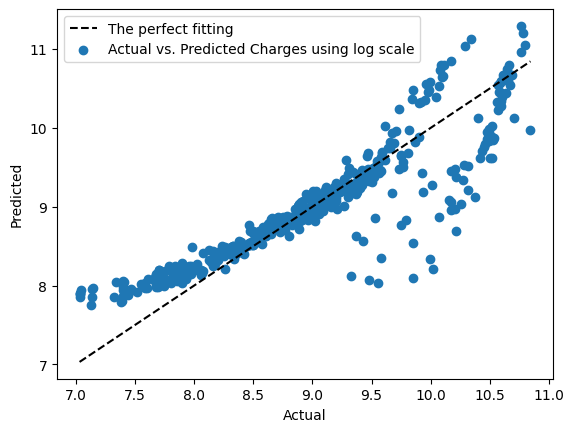

In [22]:
# for scikit  we'll calculate the mse and rsquared to evaluate the model
y_pred_scikit = lin_reg.predict(X_test)

#calculate mean squared error
J_mse_sk = mean_squared_error(y_pred_scikit, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error using scikit-learn: ',J_mse_sk)
print('R square using scikit-learn :',R_square_sk)

#plotting of actual vs predicted charges
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],linestyle='--', label='The perfect fitting',color='black')
plt.scatter(y_test, y_pred_scikit, label='Actual vs. Predicted Charges using log scale')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()